# Behavioural analysis

## Preparing the data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Loading the data:

In [38]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcvct'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p0_s1_2016-10-18_1556
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p0_s2_2016-10-25_1649
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p0_s3_2016-10-25_1700
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p1_s1_2016-10-25_1101
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p1_s2_2016-10-25_1110
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p1_s3_2016-10-25_1125
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p2_s1_2016-11-01_1504
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p2_s2_2016-11-01_1519
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p2_s3_2016-11-01_1528
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p3_s2_2016-11-01_1414
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p3_s3_2016-11-01_1424
(1056, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', 

Transforming the data set first.

In [39]:
# Measuring velocities in dps:
ds.vR = np.round(ds.vR*60/35,1)
ds.vL = np.round(ds.vL*60/35,1)
# Creating columns for the slower and faster of the two speeds:
ds['vMin'] = np.amin([ds['vL'], ds['vR']], axis=0)
ds['vMax'] = np.amax([ds['vL'], ds['vR']], axis=0)
# Slow, fast, and velocity difference columns:
ds['slow'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMin),'slow'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMin),'slow'] = 1
ds['slowDir'] = ds.slow
ds.ix[ds.vL==ds.vR,'slowDir'] = 0
ds.ix[ds.nf270==1,'slow'] = 1
ds['fast'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMax),'fast'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMax),'fast'] = 1
ds['vDiff'] = np.round(ds.vMax-ds.vMin,0)

In [40]:
# The minimum size of the ring in the old paradigm corresponded to full field, so recoding:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 258
ds['ringSzDeg'] = np.round(ds.ringSz/35,1)
# The full-field should be coded as 'no center-surround', or 'no ring':
ds['ring'] = 0
ds.ix[ds.ringSz!=258,'ring'] = 1
# Two separate data sets for ring and no ring:
#ssRing = ds[ds.ring==1]
#ssNoRing = ds[ds.ring==0]
# Separate data sets for fast and slow:
#ssSlow = ds[ds.slow==1]
#ssFast = ds[ds.fast==1]
# Slow/fast center/whole
ds['slowCenter'] = 0
ds.ix[(ds.slow==1) & (ds.ring==1),'slowCenter'] = 1
ds['fastCenter'] = 0
ds.ix[(ds.fast==1) & (ds.ring==1),'fastCenter'] = 1
ds['slowWhole'] = 0
ds.ix[(ds.slow==1) & (ds.ring==0),'slowWhole'] = 1
ds['fastWhole'] = 0
ds.ix[(ds.fast==1) & (ds.ring==0),'fastWhole'] = 1
ds['transparent'] = 0
ds.ix[ds.nf090==1,'transparent'] = 1

In [41]:
ds.head(5)

,expName,time,participant,session,trialN,dirL,dirR,vL,vR,szL,...,slowDir,fast,vDiff,ringSzDeg,ring,slowCenter,fastCenter,slowWhole,fastWhole,transparent
0,mcvct_bv0,2016-10-18_1556,0,1,1,180,0,1.0,8.2,256,...,0,0,7.0,7.4,0,0,0,1,0,0
1,mcvct_bv0,2016-10-18_1556,0,1,2,0,180,2.1,4.1,256,...,0,1,2.0,2.8,1,0,1,0,0,0
2,mcvct_bv0,2016-10-18_1556,0,1,3,0,180,8.2,16.5,256,...,0,1,8.0,3.9,1,0,1,0,0,0
3,mcvct_bv0,2016-10-18_1556,0,1,4,0,180,8.2,0.5,256,...,0,0,8.0,3.9,1,1,0,0,0,0
4,mcvct_bv0,2016-10-18_1556,0,1,5,0,180,4.1,0.0,256,...,0,0,4.0,3.9,1,1,0,0,0,0


### Slow center or whole field

(-0.1, 1.1)

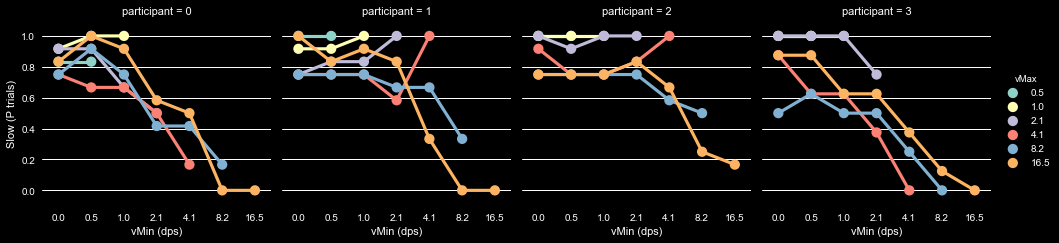

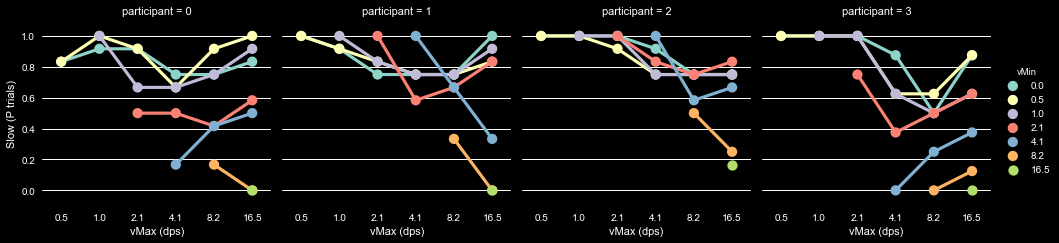

In [42]:
g = sns.factorplot(x='vMin', y='slow', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Slow (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='slow', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Slow (P trials)')
plt.ylim(-0.1,1.1)

### Types of responses

In [43]:
summary = ds.groupby(['participant','vMin'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','transparent'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['vMin'] = summary.vMin
sumPtnts['slowCenter'] = summary.slowCenter['mean']
sumPtnts['fastCenter'] = summary.fastCenter['mean']
sumPtnts['slowWhole'] = summary.slowWhole['mean']
sumPtnts['fastWhole'] = summary.fastWhole['mean']
sumPtnts['transparent'] = summary.transparent['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','vMin'])
sumVmin = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVmin.head(5)

,participant,vMin,response,proportion trials
0,0,0.0,slowCenter,0.333333
1,0,0.5,slowCenter,0.439394
2,0,1.0,slowCenter,0.555556
3,0,2.1,slowCenter,0.404762
4,0,4.1,slowCenter,0.333333


(-0.1, 1.1)

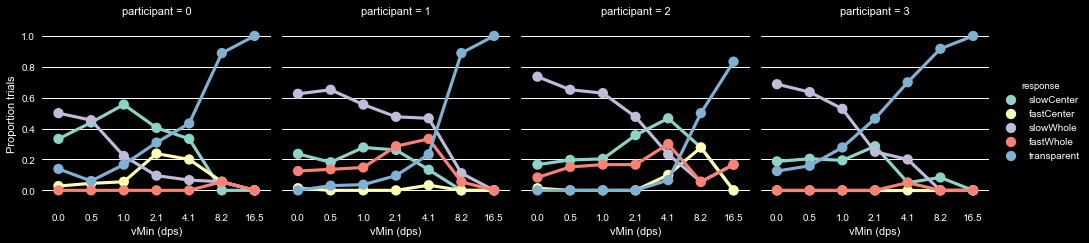

In [44]:
g = sns.factorplot(x='vMin', y='proportion trials', hue='response', col='participant', data=sumVmin, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

In [45]:
summary = ds.groupby(['participant','vMax'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','transparent'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['vMax'] = summary.vMax
sumPtnts['slowCenter'] = summary.slowCenter['mean']
sumPtnts['fastCenter'] = summary.fastCenter['mean']
sumPtnts['slowWhole'] = summary.slowWhole['mean']
sumPtnts['fastWhole'] = summary.fastWhole['mean']
sumPtnts['transparent'] = summary.transparent['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','vMax'])
sumVmax = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVmax.head(5)

,participant,vMax,response,proportion trials
0,0,0.5,slowCenter,0.000000
1,0,1.0,slowCenter,0.133333
2,0,2.1,slowCenter,0.071429
3,0,4.1,slowCenter,0.388889
4,0,8.2,slowCenter,0.545455


(-0.1, 1.1)

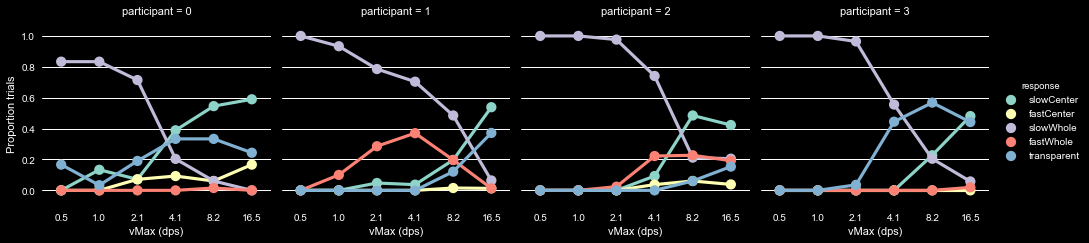

In [46]:
g = sns.factorplot(x='vMax', y='proportion trials', hue='response', col='participant', data=sumVmax, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

In [47]:
summary = ds.groupby(['participant','vDiff'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','transparent'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['vDiff'] = summary.vDiff
sumPtnts['slowCenter'] = summary.slowCenter['mean']
sumPtnts['fastCenter'] = summary.fastCenter['mean']
sumPtnts['slowWhole'] = summary.slowWhole['mean']
sumPtnts['fastWhole'] = summary.fastWhole['mean']
sumPtnts['transparent'] = summary.transparent['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','vDiff'])
sumVdiff = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVdiff.head(5)

,participant,vDiff,response,proportion trials
0,0,0.0,slowCenter,0.083333
1,0,1.0,slowCenter,0.125000
2,0,2.0,slowCenter,0.083333
3,0,3.0,slowCenter,0.666667
4,0,4.0,slowCenter,0.333333


(-0.1, 1.1)

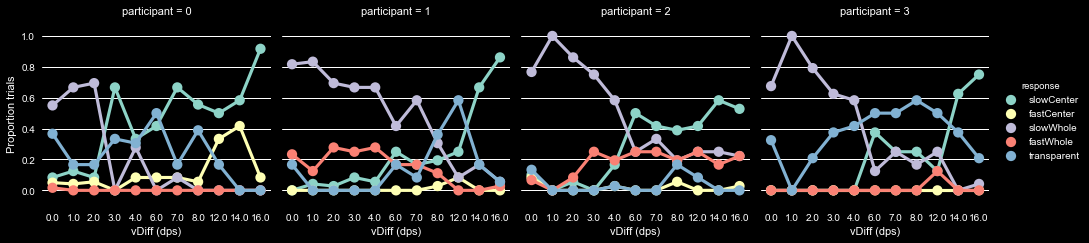

In [48]:
g = sns.factorplot(x='vDiff', y='proportion trials', hue='response', col='participant', data=sumVdiff, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vDiff (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

### Occurrence of center-surround as a function of speed combinations

#### Slow center

(-0.1, 1.1)

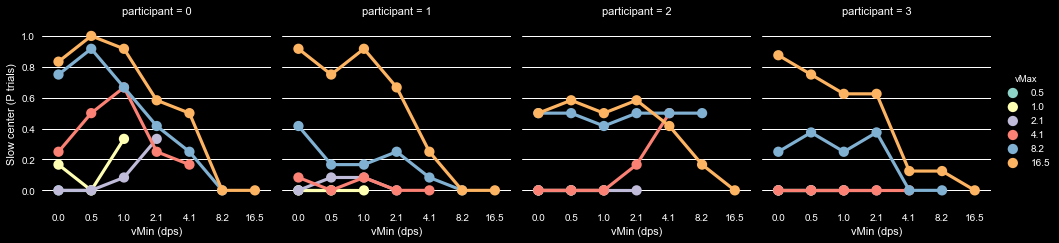

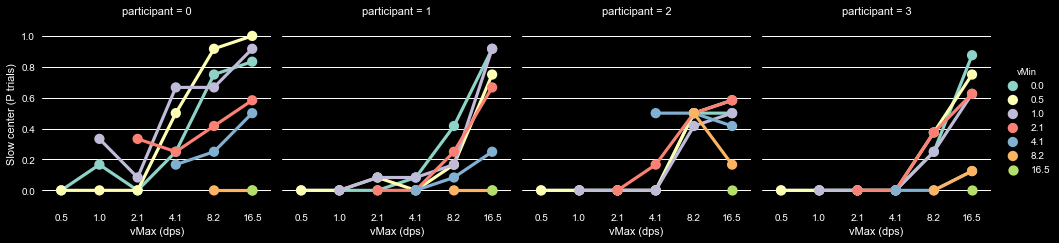

In [49]:
g = sns.factorplot(x='vMin', y='slowCenter', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Slow center (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='slowCenter', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Slow center (P trials)')
plt.ylim(-0.1,1.1)

There is a clear relationship between maximum speed and the occurrence of slow center: if either of two speeds is 8cpd or above, the center is likely to appear slow, especially if the other velocity is low.

In [50]:
#g = sns.factorplot(x='vDiff', y='ring', col='participant', data=ssSlow, 
#               col_wrap=4, size=3.5, ci=None, estimator=np.mean)
#g.set_axis_labels('vDiff (dps)','Slow center (P trials)')
#g.set_xticklabels(np.sort(ds['vDiff'].unique().astype(int)))
#plt.ylim(-0.1,1.1)

Center-surround effect is associated with higher maximum speeds.

#### Slow direction vs. slow down

(-0.1, 1.1)

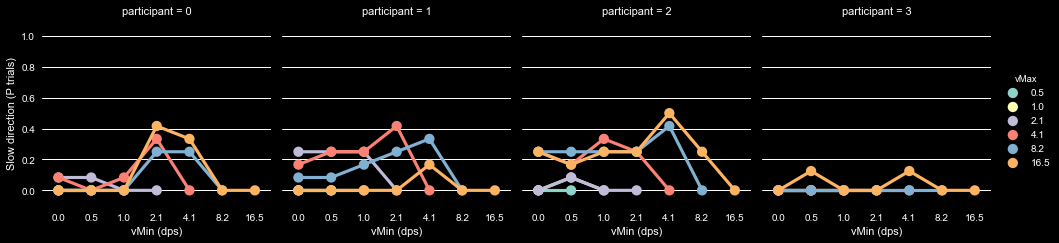

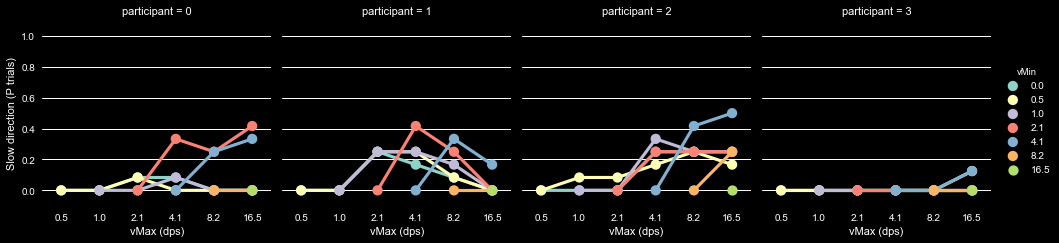

In [51]:
g = sns.factorplot(x='vMin', y='slowDir', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Slow direction (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='slowDir', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Slow direction (P trials)')
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

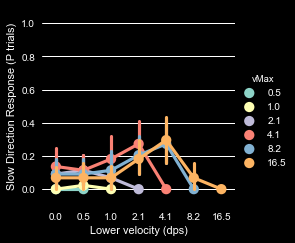

In [52]:
g = sns.factorplot(x='vMin', y='slowDir', hue='vMax', data=ds, size=3.5)
g.set_axis_labels('Lower velocity (dps)','Slow Direction Response (P trials)')
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

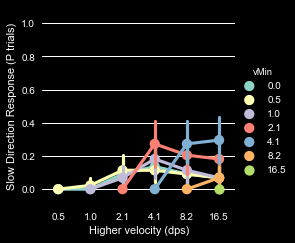

In [54]:
g = sns.factorplot(x='vMax', y='slowDir', hue='vMin', data=ds, size=3.5, label=False)
g.set_axis_labels('Higher velocity (dps)','Slow Direction Response (P trials)')
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

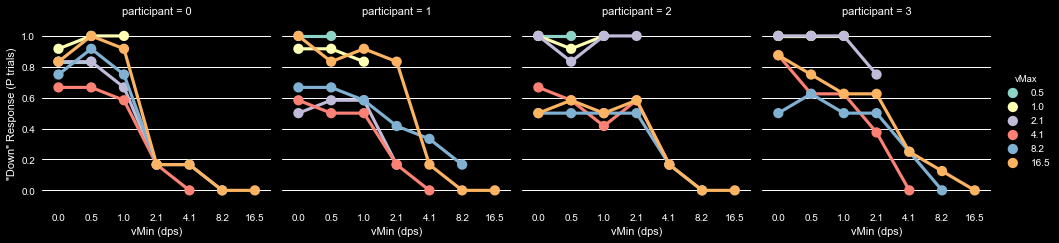

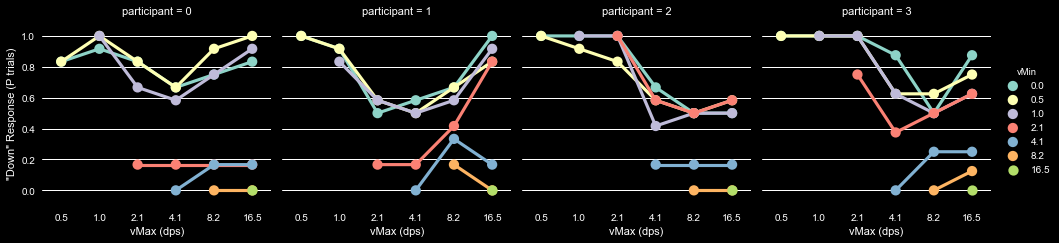

In [17]:
g = sns.factorplot(x='vMin', y='nf270', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','"Down" Response (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='nf270', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','"Down" Response (P trials)')
plt.ylim(-0.1,1.1)


(-0.1, 1.1)

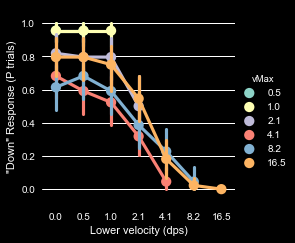

In [18]:
g = sns.factorplot(x='vMin', y='nf270', hue='vMax', data=ds, size=3.5)
g.set_axis_labels('Lower velocity (dps)','"Down" Response (P trials)')
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

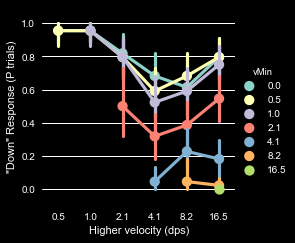

In [19]:
g = sns.factorplot(x='vMax', y='nf270', hue='vMin', data=ds, size=3.5, label=False)
g.set_axis_labels('Higher velocity (dps)','"Down" Response (P trials)')
plt.ylim(-0.1,1.1)

#### Fast center

(-0.1, 1.1)

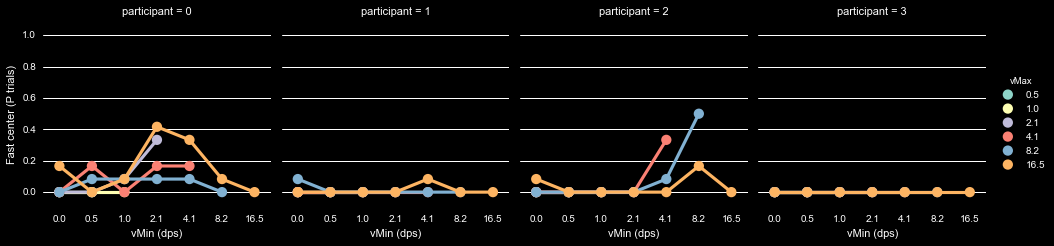

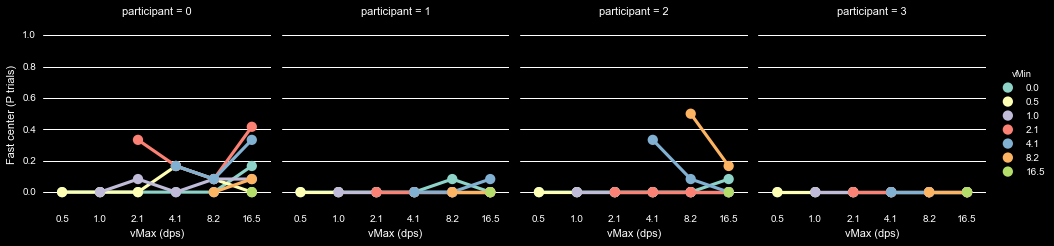

In [97]:
g = sns.factorplot(x='vMin', y='fastCenter', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Fast center (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='fastCenter', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Fast center (P trials)')
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

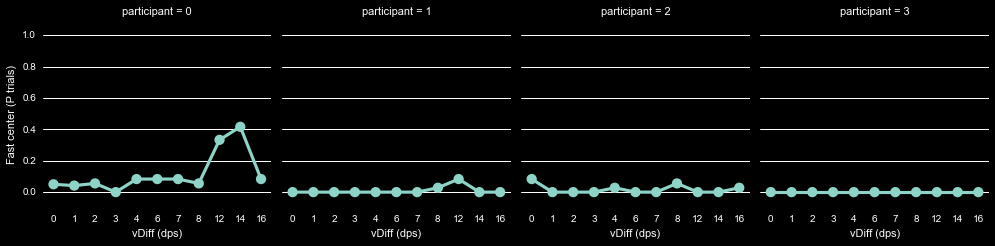

In [100]:
g = sns.factorplot(x='vDiff', y='fastCenter', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None, estimator=np.mean)
g.set_axis_labels('vDiff (dps)','Fast center (P trials)')
g.set_xticklabels(np.sort(ds['vDiff'].unique().astype(int)))
plt.ylim(-0.1,1.1)

Very rare instances of fast center.

## Center size for different speed combinations

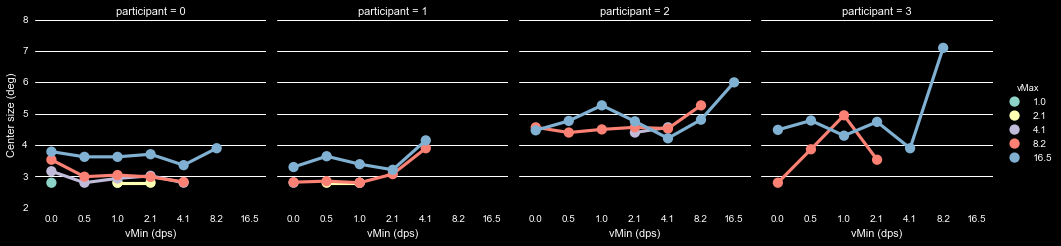

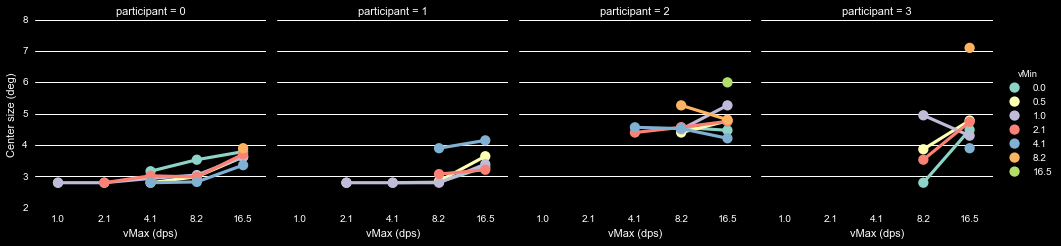

In [102]:
g = sns.factorplot(x='vMin', y='ringSzDeg', hue='vMax', col='participant', data=ssRing, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Center size (deg)')
g = sns.factorplot(x='vMax', y='ringSzDeg', hue='vMin', col='participant', data=ssRing, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Center size (deg)')

(-0.5, 8)

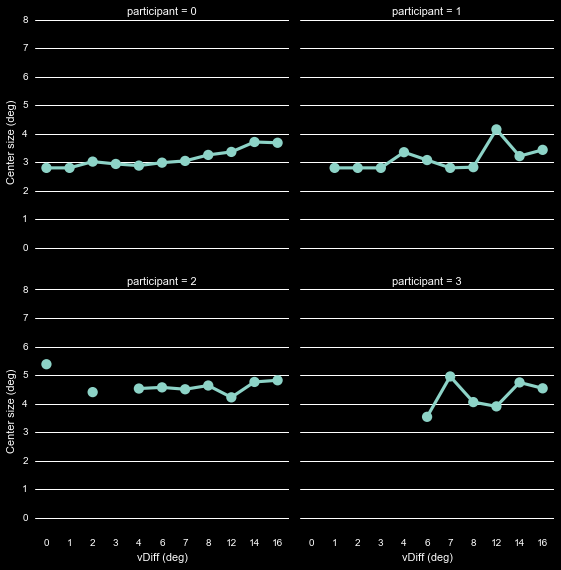

In [101]:
g = sns.factorplot(x='vDiff', y='ringSzDeg', col='participant', data=ssRing, 
               col_wrap=2, size=4, ci=None)
g.set_axis_labels('vDiff (deg)','Center size (deg)')
g.set_xticklabels(np.sort(ds['vDiff'].unique().astype(int)))
plt.ylim(-0.5,8)

 Generally, slightly larger center size with increased difference between the two competing speeds.

### Type of response as a function of velocity in whole-field trials

#### Whole-field slow

(-0.1, 1.1)

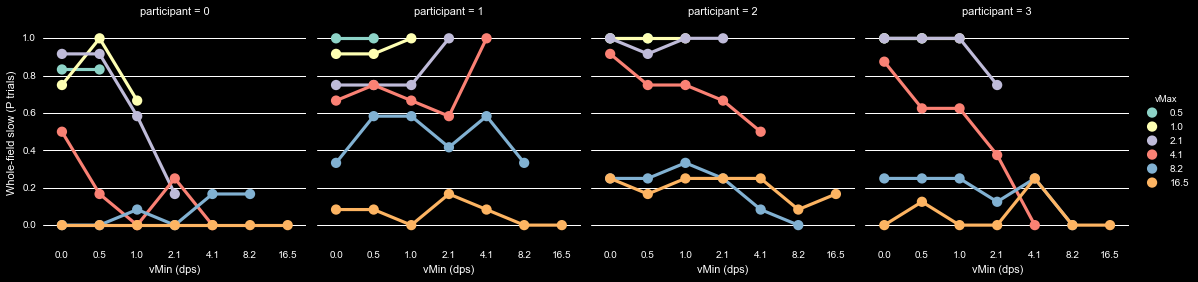

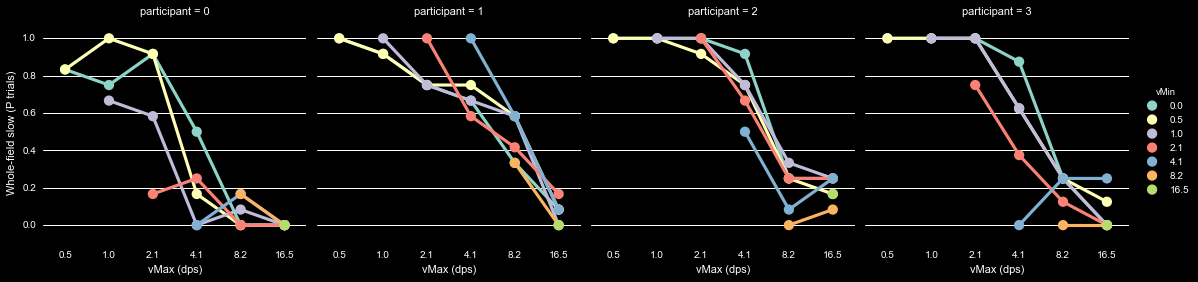

In [106]:
g = sns.factorplot(x='vMin', y='slowWhole', hue='vMax', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMin (dps)','Whole-field slow (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='slowWhole', hue='vMin', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMax (dps)','Whole-field slow (P trials)')
plt.ylim(-0.1,1.1)

Whole-field slow responses are mostly confined to instances when both stimuli are slow.

#### Whole-field fast

(-0.1, 1.1)

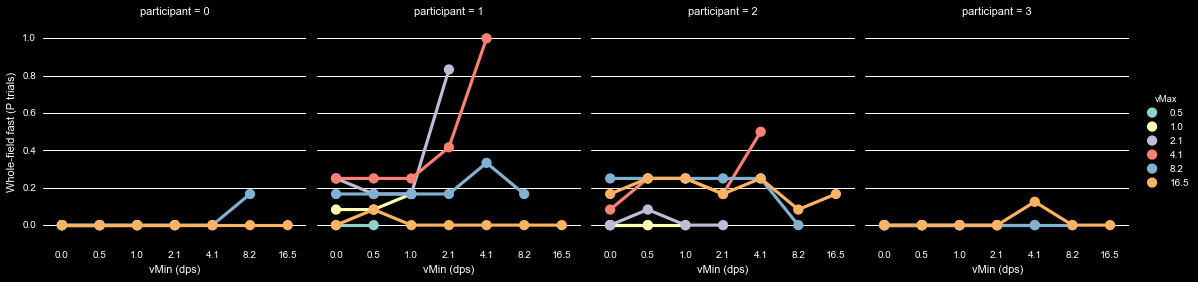

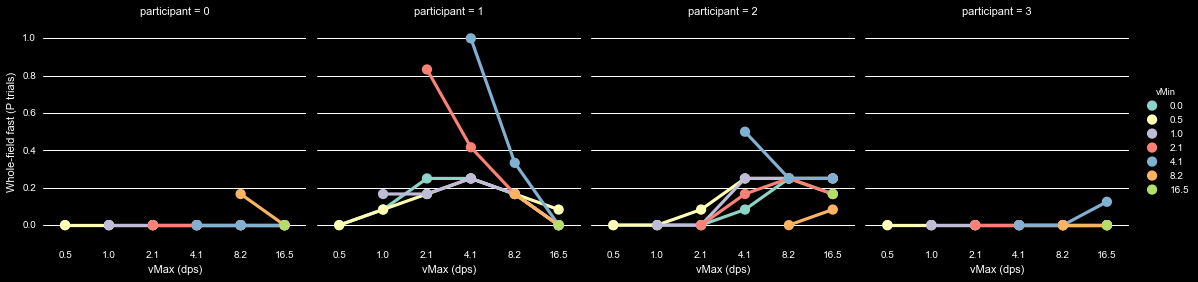

In [111]:
g = sns.factorplot(x='vMin', y='fastWhole', hue='vMax', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMin (dps)','Whole-field fast (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='fastWhole', hue='vMin', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMax (dps)','Whole-field fast (P trials)')
plt.ylim(-0.1,1.1)

Whole-field fast responses occur rarely, and only for two out of four participants, for intermediate speeds.

#### Whole-field transparency

(-0.1, 1.1)

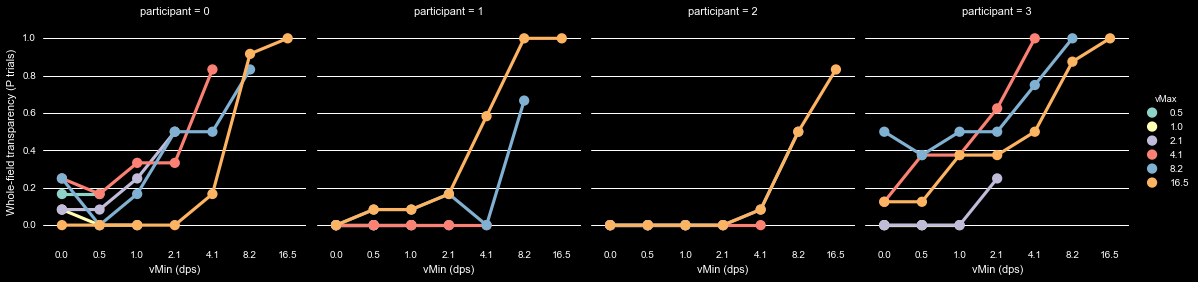

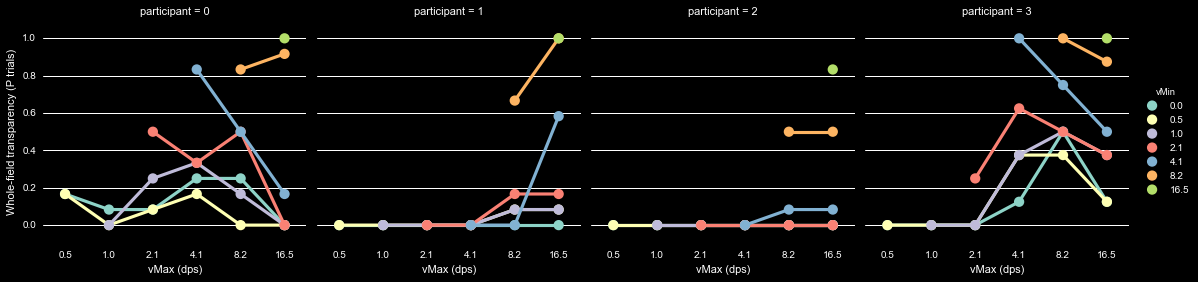

In [110]:
g = sns.factorplot(x='vMin', y='nf090', hue='vMax', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMin (dps)','Whole-field transparency (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='nf090', hue='vMin', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMax (dps)','Whole-field transparency (P trials)')
plt.ylim(-0.1,1.1)

Transparency is perceived when both motions are fast. As they move in the opposite direction, they seem to happen on top of each other.

In [41]:
ds.groupby(['participant'],
                     as_index=False)['ringSzDeg'].agg([np.count_nonzero, np.size]).reset_index()

,participant,count_nonzero,size
0,0,288.0,288.0
1,1,288.0,288.0
2,2,288.0,288.0
3,3,192.0,192.0


# Eye-tracking data

## Data import

In [69]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

IndexError: list index out of range

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd